<a href="https://colab.research.google.com/github/rsidorchuk93/images/blob/main/Age_image_classification_family_VIT_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determine age group of my family members using pre-trained Vision Transformer (ViT) model and fine tuned for age recognition task

In [ ]:
# Install transformers library
! pip install transformers

In [ ]:
!pip install fairface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement fairface (from versions: none)
ERROR: No matching distribution found for fairface


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from transformers import ViTImageProcessor, ViTForImageClassification

In [ ]:
# Initialize the model and feature extractor
# Fine tuned transformer for age recognition https://github.com/dchen236/FairFace
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
processor = ViTImageProcessor.from_pretrained('nateraw/vit-age-classifier')

In [ ]:
# Define target image size
target_size = (204, 256)

# Define a dictionary to store the image data
image_data = {}

# Load and process images
photo_dir = '/content/drive/My Drive/test/photo_age'
images = {}
for filename in os.listdir(photo_dir):
    if filename.endswith('.jpg'):
        filepath = os.path.join(photo_dir, filename)
        image = Image.open(filepath).resize(target_size)
        images[filename] = image

In [ ]:
# Define the age groups
age_groups = {
    0: '0-2',
    1: '3-9',
    2: '10-19',
    3: '20-29',
    4: '30-39',
    5: '40-49',
    6: '50-59',
    7: '60-69',
    8: '70-79',
    9: '80+'
}

Image: mom_54.jpg


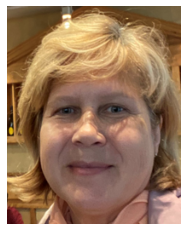

Predicted age group: 40-49
Confidence score: 0.28

Image: grandpa_82.jpg


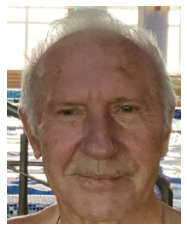

Predicted age group: 70-79
Confidence score: 0.76

Image: dad_55.jpg


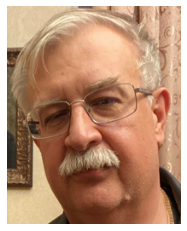

Predicted age group: 60-69
Confidence score: 0.52

Image: grandma_77.jpg


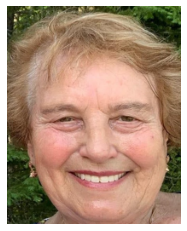

Predicted age group: 60-69
Confidence score: 0.47

Image: me_28.jpg


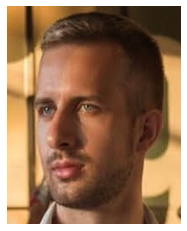

Predicted age group: 20-29
Confidence score: 0.76



In [ ]:
# Loop through each image in the dictionary
for name, image in images.items():
    # Transform the image and pass it through the model
    inputs = processor(image, return_tensors='pt')
    output = model(**inputs)

    # Predict the age group and confidence score
    proba = output.logits.softmax(1)
    preds = proba.argmax(1)
    confidence = proba[0][preds].item()
    age_group = age_groups[preds.item()]

    # Print the results
    print(f'Image: {name}')
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f'Predicted age group: {age_group}')
    print(f'Confidence score: {confidence:.2f}\n')

**Classification model largely correctly predicted age groups of my family members with some minor errors.** I didn't do data preprocessing beyond just cutting faces - preprocessing could improve results